**4. Tarea 4: Modelamiento**

>4.1 Particionamiento del conjunto de datos en entrenamiento y prueba


Modelamiento con Variable Y normalizada

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


Modelamiento con Variable Y sin normalización

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >>4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

Matplotlib is building the font cache; this may take a moment.


In [6]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [7]:
data_df = pd.read_csv("clean_data.csv", sep=',')
data_df.head()

,Unnamed: 0,PUNT_GLOBAL,FAMI_TIENEAUTOMOVIL_Si,FAMI_TIENECOMPUTADOR_Si,FAMI_TIENEINTERNET_Si,FAMI_TIENELAVADORA_Si,COLE_AREA_UBICACION_URBANO
0,1,332.0,True,True,True,True,True
1,2,257.0,False,True,True,True,True
2,3,251.0,False,True,False,True,True
3,4,251.0,False,True,False,True,True
4,5,329.0,True,True,True,True,True


In [13]:
#Quitar variable Unnamed:o
data_df.drop(columns=['Unnamed: 0'], inplace=True)
#Cuenta los nulos
data_df.isnull().sum()

PUNT_GLOBAL                   0
FAMI_TIENEAUTOMOVIL_Si        0
FAMI_TIENECOMPUTADOR_Si       0
FAMI_TIENEINTERNET_Si         0
FAMI_TIENELAVADORA_Si         0
COLE_AREA_UBICACION_URBANO    0
dtype: int64

In [14]:
data_df_modeling =data_df.copy()

## Tarea 4: Modelamiento Y no escalada

### 4.1 Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.
Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [15]:
#Separar variables indepnedientes y de interes
X = data_df_modeling.drop("PUNT_GLOBAL", axis=1)
Y = data_df_modeling["PUNT_GLOBAL"]

In [28]:
#Normalizar variables númericas: features_numericas
#features_numericas_wiyhout_y= features_numericas

In [16]:
#Separamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Escalamiento
# Inicializar el objeto StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Escalamiento en X
#X_train[features_numericas] = scaler_X.fit_transform(X_train[features_numericas])
#X_test[features_numericas] = scaler_X.transform(X_test[features_numericas])

#Adecuamos a numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

#Escalamiento en Y
#y_train= scaler_y.fit_transform(y_train)
#y_test = scaler_y.transform(y_test)

#Imprimimos dimensiones
print("Train shape:  ",X_train.shape, y_train.shape)
print("Test shape:  ",X_test.shape, y_test.shape)

#Media y desvest
print("Media de X_train_scaled:", np.mean(X_train, axis=0))
print("Media de y_train_scaled:", np.mean(y_train, axis=0))



Train shape:   (64367, 5) (64367, 1)
Test shape:   (27587, 5) (27587, 1)
Media de X_train_scaled: [0.26995199 0.6221511  0.608262   0.74553731 0.86379667]
Media de y_train_scaled: [253.65115665]


### 4.2 Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).
En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [17]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

coeficientes=model.coef_[0]
features = X.columns

for i, feature in enumerate(features):
  print(f"Coeficiente de {feature}: {coeficientes[i]}")

print(f"\nIntercepto: {model.intercept_[0]}")

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 10.298139579951581
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 11.626961145720427
Coeficiente de FAMI_TIENEINTERNET_Si: 9.630645127546805
Coeficiente de FAMI_TIENELAVADORA_Si: 5.4187849919909645
Coeficiente de COLE_AREA_UBICACION_URBANO: -1.1558986006601226

Intercepto: 234.73802617155638


**Validación Cuantitativa**

In [18]:
# Obtener las predicciones para el set Train
y_pred = model.predict(X_train)
y_train_original = y_train

# MAE
mae = mean_absolute_error(y_train_original, y_pred)
# MSE
mse = mean_squared_error(y_train_original, y_pred)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_train,y_train))

MAE: 35.5529416540226
MSE: 1941.6268889736136
RMSE: 44.06389552653752
R2: 0.07212795172189301


In [19]:
# Obtener las predicciones para el set Tes
y_pred_test = model.predict(X_test)
y_test_original = y_test

# MAE
mae = mean_absolute_error(y_test_original, y_pred_test)
# MSE
mse = mean_squared_error(y_test_original, y_pred_test)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_test,y_test))

MAE: 35.43339656535729
MSE: 1931.1222106932084
RMSE: 43.944535618131276
R2: 0.07277516954706797


**Validación Cualitativa**

In [20]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

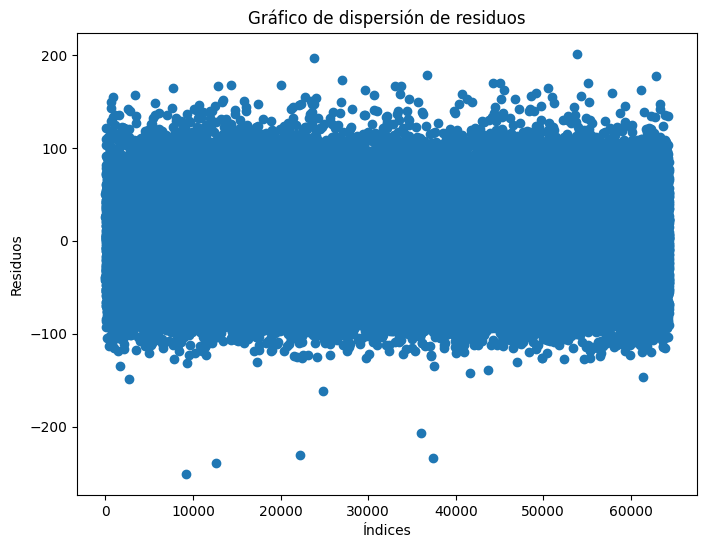

In [21]:
#residuos de la prediccion
residuals = y_train - y_pred
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.3 Entrenamiento de un segundo modelo de regresión lineal (LASSO)

In [22]:
# Crear el modelo
model_lasso = Lasso(alpha=0.01)

# Entrenar el modelo
model_lasso.fit(X_train, y_train)

# Initialize an empty list to store selected features
selected_features = []
selected_features_index = []
feature_names = X.columns
for i, feature in enumerate(feature_names):
  if abs(model_lasso.coef_[i]) > 0.0001:
    selected_features.append(feature)
    selected_features_index.append(i)
    print(f"Coeficiente de {feature}: {model_lasso.coef_[i]}")

print("Intercept: ", model_lasso.intercept_[0])

Coeficiente de FAMI_TIENEAUTOMOVIL_Si: 10.268920201760448
Coeficiente de FAMI_TIENECOMPUTADOR_Si: 11.60774152965175
Coeficiente de FAMI_TIENEINTERNET_Si: 9.604843400962185
Coeficiente de FAMI_TIENELAVADORA_Si: 5.381854425290745
Coeficiente de COLE_AREA_UBICACION_URBANO: -1.0578314714641532
Intercept:  234.7163887721326


**Validación Cuantitativa**

In [23]:
# Obtener las predicciones para el set Train
y_pred_lasso = model_lasso.predict(X_train).reshape(-1,1)
y_train_original = y_train
# MAE
mae_lasso  = mean_absolute_error(y_train_original, y_pred_lasso)
# MSE
mse_lasso  = mean_squared_error(y_train_original, y_pred_lasso)
# RMSE
rmse_lasso  = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_train,y_train))

MAE: 35.553156230367755
MSE: 1941.628980408817
RMSE: 43.944535618131276
R2: 0.07212695225887722


In [24]:
# Obtener las predicciones para el set Test
y_pred_test_lasso = model_lasso.predict(X_test)
y_test_original = y_test
# MAE
mae_lasso = mean_absolute_error(y_test_original, y_pred_test_lasso)
# MSE
mse_lasso = mean_squared_error(y_test_original, y_pred_test_lasso)
# RMSE
rmse_lasso = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_test,y_test))

MAE: 35.433663578908934
MSE: 1931.115036133759
RMSE: 43.944535618131276
R2: 0.07277861439878797


**Validación Cualitativa**

In [25]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

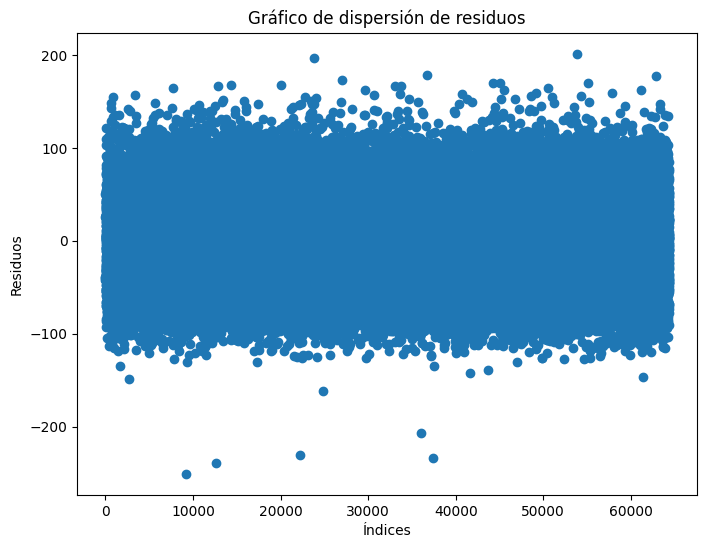

In [26]:
#residuos de la prediccion
residuals = y_train - y_pred_lasso.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.4 Entrenamiento de un tercer modelo de regresión lineal (BAGGING)

In [28]:
from sklearn.ensemble import BaggingRegressor

# Crear el modelo base (Lasso)
model = LinearRegression()

# Crear el modelo Bagging con Lasso como estimador base
bagging_lasso = BaggingRegressor(model, n_estimators=15, random_state=42)

# Entrenar el modelo Bagging
bagging_lasso.fit(X_train[:, selected_features_index], y_train)

/Users/sandrilla/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_bagging.py:581: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(estimator=LinearRegression(), n_estimators=15, random_state=42)

**Validación Cuantitativa**

In [29]:
# Obtener las predicciones para el conjunto de entrenamiento
y_pred_train_bagging = bagging_lasso.predict(X_train[:, selected_features_index])
y_train_original = y_train

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train_bagging = mean_absolute_error(y_train_original, y_pred_train_bagging)
mse_train_bagging = mean_squared_error(y_train_original, y_pred_train_bagging)
rmse_train_bagging = np.sqrt(mse_train_bagging)
r2_train_bagging = bagging_lasso.score(X_train[:, selected_features_index], y_train)


# Imprimir las métricas de evaluación
print("Métricas de evaluación para el conjunto de entrenamiento:")
print("MAE:", mae_train_bagging)
print("MSE:", mse_train_bagging)
print("RMSE:", rmse_train_bagging)
print("R2:", r2_train_bagging)

Métricas de evaluación para el conjunto de entrenamiento:
MAE: 35.55216849009857
MSE: 1941.6449869704704
RMSE: 44.06410088689511
R2: 0.0721193029822671


In [30]:
# Obtener las predicciones para el conjunto de prueba
y_pred_test_bagging = bagging_lasso.predict(X_test[:, selected_features_index])
y_test_original = y_test

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test_bagging = mean_absolute_error(y_test_original, y_pred_test_bagging)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)
r2_test_bagging = bagging_lasso.score(X_test[:, selected_features_index], y_test)

# Imprimir los resultados
print("Métricas de evaluación para el conjunto de prueba:")
print("MAE:", mae_test_bagging)
print("MSE:", mse_test_bagging)
print("RMSE:", rmse_test_bagging)
print("R2:", r2_test_bagging)

Métricas de evaluación para el conjunto de prueba:
MAE: 35.43326499383512
MSE: 1931.2197990915927
RMSE: 43.94564596284361
R2: 0.07272831265440471


**Validación Cualitativa**

In [31]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

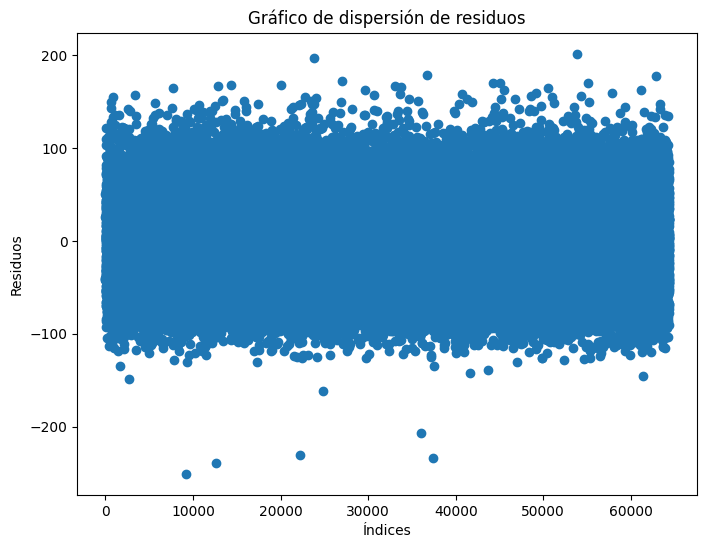

In [32]:
#residuos de la prediccion
residuals = y_train - y_pred_train_bagging.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()